In [115]:
# -*- coding: utf-8 -*-

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import pandas as np
import yfinance as yf
import pandas as pd

from brownian_motion import *
from technical_analysis import *

(8161, 1)


Text(0.5, 1.0, 'Realisations du brownien')

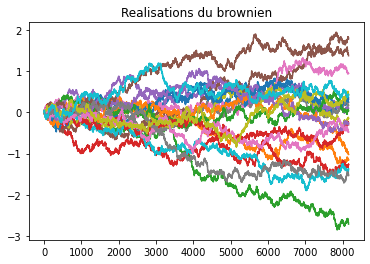

In [16]:
T=1 # temps final
N=255*8*4
dt=T/N
timerange = np.linspace(0,T,N+1,endpoint=True)
timerange=timerange[:,None]
print(timerange.shape)


M=20 #no de realisations
#construction de Wt:
Wt, _ = create_brownian_motion(maturity = T, steps = N, no_realisations = M)

plt.plot(Wt)
plt.title('Realisations du brownien')

Text(0.5, 1.0, 'Realisations du sous-jacent')

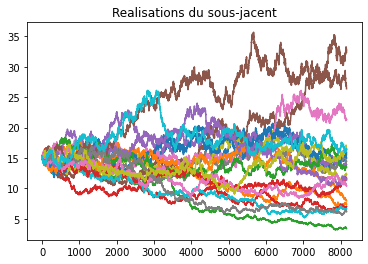

In [26]:
S0 = 15.0
mu = 0.001
sigma = 0.5
taux_r = 0.05

St = underlying_asset(S0, mu, sigma, timerange, Wt)
# Formule : S0*np.exp( (mu-sigma**2.0/2.0)*t+ sigma*Wt)

plt.plot(St)
plt.title('Realisations du sous-jacent')

In [92]:
tte = yf.Ticker('TTE')
history_tte = tte.history(start='2021-12-21', end='2023-01-04')

In [93]:
df_history_tte = pd.DataFrame(history_tte)
df_history_tte

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2021-12-21 00:00:00-05:00,45.539918,46.596633,45.539918,46.449612,2027100,0.000,0.0
2021-12-22 00:00:00-05:00,46.128007,46.798792,45.879908,46.605827,1354500,0.000,0.0
2021-12-23 00:00:00-05:00,46.844736,47.166348,46.789602,46.936626,1046700,0.000,0.0
2021-12-27 00:00:00-05:00,46.559882,46.918250,46.366917,46.872303,1149900,0.000,0.0
2021-12-28 00:00:00-05:00,47.010135,47.157157,46.807979,47.065269,1031500,0.000,0.0
...,...,...,...,...,...,...,...
2022-12-27 00:00:00-05:00,62.739725,63.085697,62.225708,62.650761,963300,0.000,0.0
2022-12-28 00:00:00-05:00,63.263624,63.283391,61.602954,61.771000,1169600,0.000,0.0
2022-12-29 00:00:00-05:00,62.480000,62.750000,61.919998,62.160000,1459400,0.719,0.0


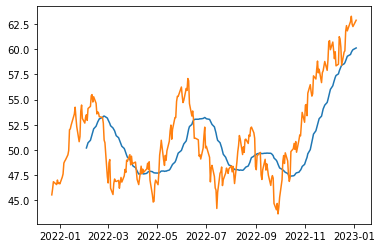

In [103]:
plt.plot(df_history_tte['Open'].rolling(30).mean())
plt.plot(df_history_tte['Open'])

<class 'pandas.core.series.Series'>


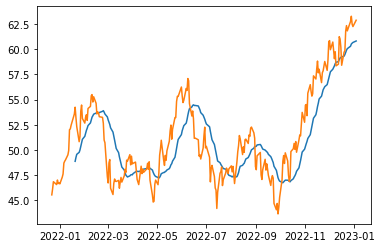

In [114]:
print(type(df_history_tte['Open']))
rolling_tte = rolling_mean(df_history_tte['Open'], 20)
plt.plot(rolling_tte)
plt.plot(df_history_tte['Open'])